#### Import and Read

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
plt.rcParams['figure.figsize'] = [10, 5]

In [38]:
df = pd.read_csv("raw_data.csv")
df_agg = pd.read_csv("agg_features_and_label.csv")

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [42]:
df

,order_time,poc_id,sku,description,qty,spend,category,category_eng,year,month,...,measurement_type,units_in_pack,returnable_pack_type,returnable_serving_type,serving_type,flavour_specific_brand,calculated_volume_liter,liquor_type,pack_type,image_title
0,2019-10-09,420266,B000068,PTE LG HU 33.8 OZ PROMOCION,2,2716.57,CERVEZAS,BEER,2019,10,...,OZ,12.0,1.0,1.0,BOTTLE,NaN,11.995214,NaN,HUACAL,PRESIDENTE LIGHT_33.8 OZ_BOTTLE
1,2019-10-09,420266,B000082,THE ONE HU 16/22OZ,2,2939.17,CERVEZAS,BEER,2019,10,...,OZ,16.0,1.0,1.0,BOTTLE,NaN,10.410048,NaN,HUACAL,THE ONE_22 OZ_BOTTLE
2,2019-10-09,420266,B000231,PTE REG HU 33.8 OZ PROMOCION,2,2716.57,CERVEZAS,BEER,2019,10,...,OZ,12.0,1.0,1.0,BOTTLE,NaN,11.995214,NaN,HUACAL,PRESIDENTE_33.8 OZ_BOTTLE
3,2019-10-09,420266,B001424,M. LOW. CJ 24/13OZ ONE WAY,0,0.00,MALTAS,MALT BEER,2019,10,...,OZ,24.0,0.0,0.0,BOTTLE,NaN,9.227088,NaN,CARTON,LOWENBRAU_13 OZ_BOTTLE
4,2019-10-09,420266,B001435,BRAHMA LIGHT HU 12/1L 33.8 ONZ,2,2522.53,CERVEZAS,BEER,2019,10,...,OZ,12.0,1.0,1.0,BOTTLE,NaN,11.995214,NaN,HUACAL,BRAHMA LIGHT_33.8 OZ_BOTTLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841836,2020-09-30,256798,B000231,PTE REG HU 33.8 OZ PROMOCION,2,2788.34,CERVEZAS,BEER,2020,9,...,OZ,12.0,1.0,1.0,BOTTLE,NaN,11.995210,NaN,HUACAL,Presidente Regular_33.8 OZ_BOTTLE
2841837,2020-09-30,256798,B000603,M.MORENA 24/12OZ CJ,1,578.00,MALTAS,MALT BEER,2020,9,...,OZ,24.0,0.0,1.0,BOTTLE,NaN,8.517312,NaN,CARTON,Malta Morena_12 OZ_BOTTLE
2841838,2020-09-30,256798,B001435,BRAHMA LIGHT HU 12/1L 33.8 ONZ,1,1308.69,CERVEZAS,BEER,2020,9,...,OZ,12.0,1.0,1.0,BOTTLE,NaN,11.995210,NaN,HUACAL,Brahma Light_33.8 OZ_BOTTLE
2841839,2020-09-30,256798,B001499,PRESIDENTE GOLDEN LIGHT HU 16/22 OZ,1,1327.91,CERVEZAS,BEER,2020,9,...,OZ,16.0,1.0,1.0,BOTTLE,NaN,10.410050,NaN,HUACAL,NaN


In [48]:
df_with_state = pd.merge(df, df_agg[["poc_id", "state"]], on="poc_id")

##### OZ - Spanish ounce (onza) = 28.75 gram
##### measurement	- howmuch liter or OZ or other measurement type 
##### cnd -  is the primary beer producer in the Dominican Republic, 

In [12]:
pd.set_option('display.max_columns', 5000) #more column to show
pd.set_option('display.max_rows', 5000) #more column to show

In [14]:
df.head(20)

,order_time,poc_id,sku,description,qty,spend,category,category_eng,year,month,is_cnd,family_brand_name,brand_name,edited_brand_name,measurement,measurement_type,units_in_pack,returnable_pack_type,returnable_serving_type,serving_type,flavour_specific_brand,calculated_volume_liter,liquor_type,pack_type,image_title
0,2019-10-09,420266,B000068,PTE LG HU 33.8 OZ PROMOCION,2,2716.57,CERVEZAS,BEER,2019,10,1,PRESIDENTE,PTE LIGHT,Presidente Light,33.8,OZ,12.0,1.0,1.0,BOTTLE,NaN,11.995214,NaN,HUACAL,PRESIDENTE LIGHT_33.8 OZ_BOTTLE
1,2019-10-09,420266,B000082,THE ONE HU 16/22OZ,2,2939.17,CERVEZAS,BEER,2019,10,1,THE ONE,REGULAR,The One,22.0,OZ,16.0,1.0,1.0,BOTTLE,NaN,10.410048,NaN,HUACAL,THE ONE_22 OZ_BOTTLE
2,2019-10-09,420266,B000231,PTE REG HU 33.8 OZ PROMOCION,2,2716.57,CERVEZAS,BEER,2019,10,1,PRESIDENTE,REGULAR,Presidente Regular,33.8,OZ,12.0,1.0,1.0,BOTTLE,NaN,11.995214,NaN,HUACAL,PRESIDENTE_33.8 OZ_BOTTLE
3,2019-10-09,420266,B001424,M. LOW. CJ 24/13OZ ONE WAY,0,0.00,MALTAS,MALT BEER,2019,10,1,LOWENBRAU,REGULAR,Lowenbrau,13.0,OZ,24.0,0.0,0.0,BOTTLE,NaN,9.227088,NaN,CARTON,LOWENBRAU_13 OZ_BOTTLE
4,2019-10-09,420266,B001435,BRAHMA LIGHT HU 12/1L 33.8 ONZ,2,2522.53,CERVEZAS,BEER,2019,10,1,BRAHMA,LIGHT,Brahma Light,33.8,OZ,12.0,1.0,1.0,BOTTLE,NaN,11.995214,NaN,HUACAL,BRAHMA LIGHT_33.8 OZ_BOTTLE
5,2019-10-09,420266,R002106,BARCELO BLANCO 24/350 ML.,4,743.73,DESTILADOS,LIQUOR,2019,10,1,BARCELO,BLANCO,Barceló Blanco,350.0,ML,24.0,0.0,0.0,BOTTLE,NaN,NaN,Rum,CARTON,BARCELO BLANCO_350 ML_BOTTLE
6,2019-10-09,420266,S000161,SEVEN UP PET 6/2LTS SHRINK LISO,1,264.01,REFRESCOS,SOFT DRINKS,2019,10,1,SEVEN UP,REGULAR,Seven Up Regular,2000.0,ML,6.0,0.0,0.0,BOTTLE,NaN,12.000000,NaN,CARTON,SEVEN UP_2 L_BOTTLE
7,2019-10-09,420266,S000283,SEVEN UP PET 12/450 ML,1,147.37,REFRESCOS,SOFT DRINKS,2019,10,1,SEVEN UP,REGULAR,Seven Up Regular,450.0,ML,12.0,0.0,0.0,BOTTLE,NaN,5.400000,NaN,FRADO,SEVEN UP_450 ML_BOTTLE
8,2019-10-09,420351,B000060,PTE. LIGHT HU 16/22OZ,2,3169.74,CERVEZAS,BEER,2019,10,1,PRESIDENTE,PTE LIGHT,Presidente Light,22.0,OZ,16.0,1.0,1.0,BOTTLE,NaN,10.410048,NaN,HUACAL,PRESIDENTE LIGHT_22 OZ_BOTTLE
9,2019-10-09,420351,B000082,THE ONE HU 16/22OZ,2,2939.17,CERVEZAS,BEER,2019,10,1,THE ONE,REGULAR,The One,22.0,OZ,16.0,1.0,1.0,BOTTLE,NaN,10.410048,NaN,HUACAL,THE ONE_22 OZ_BOTTLE


##### cnd

In [17]:
df[df["is_cnd"] == 0]

,order_time,poc_id,sku,description,qty,spend,category,category_eng,year,month,is_cnd,family_brand_name,brand_name,edited_brand_name,measurement,measurement_type,units_in_pack,returnable_pack_type,returnable_serving_type,serving_type,flavour_specific_brand,calculated_volume_liter,liquor_type,pack_type,image_title
1187984,2020-02-29,234245,ZJ000002,RICA NARANJA UHT CAJA 27/200ML,2,780.00,REFRESCOS,SOFT DRINKS,2020,2,0,NaN,RICA,Rica,200.0,ML,27.0,NaN,NaN,NaN,NaN,5.400,NaN,NaN,NaN
1187985,2020-02-29,261513,ZJ000001,MOTTS MANZANA CAJA 12/32OZ,120,11808.02,REFRESCOS,SOFT DRINKS,2020,2,0,NaN,MOTTS,Motts Manzana,32.0,OZ,12.0,NaN,NaN,BOTTLE,NaN,NaN,NaN,NaN,Motts Manzana_32 OZ_BOTTLE
1187986,2020-02-29,261527,ZJ000001,MOTTS MANZANA CAJA 12/32OZ,12,1180.80,REFRESCOS,SOFT DRINKS,2020,2,0,NaN,MOTTS,Motts Manzana,32.0,OZ,12.0,NaN,NaN,BOTTLE,NaN,NaN,NaN,NaN,Motts Manzana_32 OZ_BOTTLE
1187987,2020-02-29,261527,ZJ000002,RICA NARANJA UHT CAJA 27/200ML,1,390.00,REFRESCOS,SOFT DRINKS,2020,2,0,NaN,RICA,Rica,200.0,ML,27.0,NaN,NaN,NaN,NaN,5.400,NaN,NaN,NaN
1187988,2020-02-29,301873,ZJ000001,MOTTS MANZANA CAJA 12/32OZ,12,1180.80,REFRESCOS,SOFT DRINKS,2020,2,0,NaN,MOTTS,Motts Manzana,32.0,OZ,12.0,NaN,NaN,BOTTLE,NaN,NaN,NaN,NaN,Motts Manzana_32 OZ_BOTTLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661559,2020-09-29,288322,ZL000003,LA FUERZA VINO TINTO CAJA 12/700ML,1,1736.29,VINO,WINE,2020,9,0,NaN,LA FUERZA,La Fuerza,700.0,ML,12.0,NaN,NaN,NaN,NaN,8.400,NaN,NaN,NaN
2661560,2020-09-29,288322,ZM000004,CARNATION LECHE EV CAJA 48/315G,1,2386.20,EVAPORATED MILK,EVAPORATED MILK,2020,9,0,NaN,CARNATION,Cranation,315.0,GR,48.0,NaN,NaN,NaN,NaN,15.120,NaN,NaN,NaN
2661561,2020-09-29,239860,ZSD00001,GATORADE FRUIT PUNCH 24/591 ML,1,925.00,ENERGIZANTES,ENERGY DRINKS,2020,9,0,NaN,GATORADE,Gatorade,20.0,OZ,24.0,NaN,NaN,BOTTLE,NaN,14.184,NaN,NaN,Gatorade_20 OZ_BOTTLE
2661562,2020-09-29,508128,ZS000003,GUARINA CLUB MAX 1PACK/9UN,24,825.81,APERITIVOS,SNACKS,2020,9,0,NaN,GUARINA CLUB MAX,Guarina Club Max,36.0,GR,9.0,NaN,NaN,NaN,NaN,0.324,NaN,NaN,Guarina Club Max_36 GR


In [21]:
df.tail()

,order_time,poc_id,sku,description,qty,spend,category,category_eng,year,month,...,measurement_type,units_in_pack,returnable_pack_type,returnable_serving_type,serving_type,flavour_specific_brand,calculated_volume_liter,liquor_type,pack_type,image_title
2841836,2020-09-30,256798,B000231,PTE REG HU 33.8 OZ PROMOCION,2,2788.34,CERVEZAS,BEER,2020,9,...,OZ,12.0,1.0,1.0,BOTTLE,NaN,11.995210,NaN,HUACAL,Presidente Regular_33.8 OZ_BOTTLE
2841837,2020-09-30,256798,B000603,M.MORENA 24/12OZ CJ,1,578.00,MALTAS,MALT BEER,2020,9,...,OZ,24.0,0.0,1.0,BOTTLE,NaN,8.517312,NaN,CARTON,Malta Morena_12 OZ_BOTTLE
2841838,2020-09-30,256798,B001435,BRAHMA LIGHT HU 12/1L 33.8 ONZ,1,1308.69,CERVEZAS,BEER,2020,9,...,OZ,12.0,1.0,1.0,BOTTLE,NaN,11.995210,NaN,HUACAL,Brahma Light_33.8 OZ_BOTTLE
2841839,2020-09-30,256798,B001499,PRESIDENTE GOLDEN LIGHT HU 16/22 OZ,1,1327.91,CERVEZAS,BEER,2020,9,...,OZ,16.0,1.0,1.0,BOTTLE,NaN,10.410050,NaN,HUACAL,NaN
2841840,2020-09-30,257945,B000060,PTE. LIGHT HU 16/22OZ,16,25496.68,CERVEZAS,BEER,2020,9,...,OZ,16.0,1.0,1.0,BOTTLE,NaN,10.410050,NaN,HUACAL,Presidente Light_22 OZ_BOTTLE


#### Unique values in each column

In [6]:
for name in df.columns: 
    un_name = df[name].unique()
    print(f"Unique value in {name} column: \n{un_name} \n")
    
    

Unique value in order_time column: 
['2019-10-09' '2019-10-10' '2019-10-11' '2019-10-12' '2019-10-01'
 '2019-10-02' '2019-10-03' '2019-10-13' '2019-10-14' '2019-10-04'
 '2019-10-05' '2019-10-15' '2019-10-06' '2019-10-07' '2019-10-16'
 '2019-10-08' '2019-10-17' '2019-10-18' '2019-10-19' '2019-10-20'
 '2019-10-21' '2019-10-22' '2019-10-23' '2019-10-24' '2019-10-25'
 '2019-10-26' '2019-10-27' '2019-10-28' '2019-10-29' '2019-10-30'
 '2019-10-31' '2019-11-19' '2019-11-11' '2019-11-12' '2019-11-20'
 '2019-11-13' '2019-11-21' '2019-11-14' '2019-11-22' '2019-11-23'
 '2019-11-15' '2019-11-24' '2019-11-25' '2019-11-26' '2019-11-16'
 '2019-11-27' '2019-11-17' '2019-11-18' '2019-11-28' '2019-11-29'
 '2019-11-30' '2019-11-01' '2019-11-02' '2019-11-03' '2019-11-05'
 '2019-11-06' '2019-11-07' '2019-11-08' '2019-11-09' '2019-11-10'
 '2019-12-13' '2019-12-14' '2019-12-15' '2019-12-16' '2019-12-17'
 '2019-12-18' '2019-12-19' '2019-12-20' '2019-12-21' '2019-12-22'
 '2019-12-23' '2019-12-02' '2019-12-03' 

Unique value in category column: 
['CERVEZAS' 'MALTAS' 'DESTILADOS' 'REFRESCOS' 'MALTAS + APERITIVOS'
 'ENERGIZANTES' 'AGUA' 'DESTILADOS + REFRESCOS' 'EVAPORATED MILK'
 'APERITIVOS' 'LECHE' 'CIGARRILLOS' 'COMIDA ENLATADA' 'SARDINAS' 'VINO'
 'CONDIMENTO' 'CUIDADO PERSONAL' 'MAIZENA DURYEA'] 

Unique value in category_eng column: 
['BEER' 'MALT BEER' 'LIQUOR' 'SOFT DRINKS' 'MALT BEER + SNACKS'
 'ENERGY DRINKS' 'WATER' 'LIQUOR + SOFT DRINKS' 'EVAPORATED MILK' 'SNACKS'
 'MILK' 'CIGARETTES' 'CANNED FOOD' 'SARDINES' 'WINE' 'SEASONING'
 'PERSONAL CARE' 'CORN STARCH'] 

Unique value in year column: 
[2019 2020] 

Unique value in month column: 
[10 11 12  9  1  2  3  4  5  6  7  8] 

Unique value in is_cnd column: 
[1 0] 

Unique value in family_brand_name column: 
['PRESIDENTE' 'THE ONE' 'LOWENBRAU' 'BRAHMA' 'BARCELO' 'SEVEN UP'
 'RED ROCK' 'MALTA MORENA' 'PEPSI COLA' 'GUARANA' 'RED BULL' 'CORONA'
 'MODELO' 'ENRIQUILLO' 'BOHEMIA' 'VITAMALT' 'MONTPELLIER' 'COCO RICO'
 'STELLA ARTOIS' 'BUDWEISER

#### drop liquor_type and flavour_specific_brand columns

<AxesSubplot:>

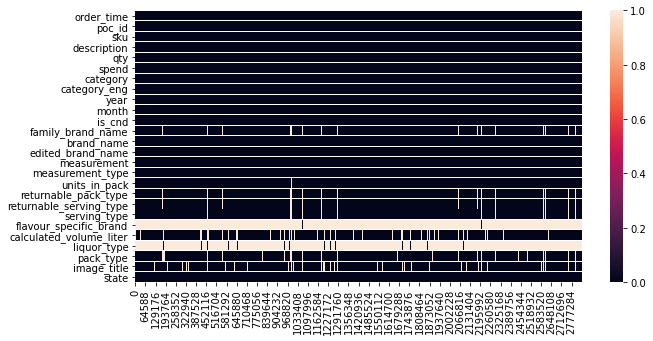

In [49]:
sns.heatmap(df_with_state.isnull().T)

so I will drop liquor_type and flavour_specific_brand columns

In [50]:
df_with_state = df_with_state.drop(columns=["flavour_specific_brand", "liquor_type"])
df_with_state

,order_time,poc_id,sku,description,qty,spend,category,category_eng,year,month,...,measurement,measurement_type,units_in_pack,returnable_pack_type,returnable_serving_type,serving_type,calculated_volume_liter,pack_type,image_title,state
0,2019-10-09,420266,B000068,PTE LG HU 33.8 OZ PROMOCION,2,2716.57,CERVEZAS,BEER,2019,10,...,33.8,OZ,12.0,1.0,1.0,BOTTLE,11.995214,HUACAL,PRESIDENTE LIGHT_33.8 OZ_BOTTLE,Regular
1,2019-10-09,420266,B000082,THE ONE HU 16/22OZ,2,2939.17,CERVEZAS,BEER,2019,10,...,22.0,OZ,16.0,1.0,1.0,BOTTLE,10.410048,HUACAL,THE ONE_22 OZ_BOTTLE,Regular
2,2019-10-09,420266,B000231,PTE REG HU 33.8 OZ PROMOCION,2,2716.57,CERVEZAS,BEER,2019,10,...,33.8,OZ,12.0,1.0,1.0,BOTTLE,11.995214,HUACAL,PRESIDENTE_33.8 OZ_BOTTLE,Regular
3,2019-10-09,420266,B001424,M. LOW. CJ 24/13OZ ONE WAY,0,0.00,MALTAS,MALT BEER,2019,10,...,13.0,OZ,24.0,0.0,0.0,BOTTLE,9.227088,CARTON,LOWENBRAU_13 OZ_BOTTLE,Regular
4,2019-10-09,420266,B001435,BRAHMA LIGHT HU 12/1L 33.8 ONZ,2,2522.53,CERVEZAS,BEER,2019,10,...,33.8,OZ,12.0,1.0,1.0,BOTTLE,11.995214,HUACAL,BRAHMA LIGHT_33.8 OZ_BOTTLE,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841836,2020-09-09,537056,S000169,PEPSI COLA PET 12/450 ML,2,368.42,REFRESCOS,SOFT DRINKS,2020,9,...,450.0,ML,12.0,0.0,0.0,BOTTLE,5.400000,FRADO,Pepsi Regular_450 ML_BOTTLE,Lagged
2841837,2020-09-09,537056,S000282,RED ROCK NARANJA PET 12/450 ML,2,368.42,REFRESCOS,SOFT DRINKS,2020,9,...,450.0,ML,12.0,0.0,0.0,BOTTLE,5.400000,FRADO,Red Rock Naranja_450 ML_BOTTLE,Lagged
2841838,2020-09-09,537056,S000285,RED ROCK MANZANA VERDE PET 12/450 ML,3,552.64,REFRESCOS,SOFT DRINKS,2020,9,...,450.0,ML,12.0,0.0,0.0,BOTTLE,5.400000,FRADO,Red Rock Manzana_450 ML_BOTTLE,Lagged
2841839,2020-09-09,537056,S000286,RED ROCK MERENROCK PET 12/450 ML,2,368.42,REFRESCOS,SOFT DRINKS,2020,9,...,450.0,ML,12.0,0.0,0.0,BOTTLE,5.400000,FRADO,Red Rock Merengue_450 ML_BOTTLE,Lagged


#### Extract top and lagged poc

Extract top and lagged poc

In [21]:
#Top
top_poc_id = df_agg[df_agg["state"]=="Top"]["poc_id"]
df_top = df.set_index("poc_id")
df_top = df_top.loc[top_poc_id]
df_top = df_top.reset_index()


#Lagged
lagged_poc_id = df_agg[df_agg["state"]=="Lagged"]["poc_id"]
df_lagged = df.set_index("poc_id")
df_lagged = df_lagged.loc[lagged_poc_id]
df_lagged = df_lagged.reset_index()

#### Examine the properties of top poc against lagged poc

##### Spend Vs month (for all, for top poc and lagged poc)

In [35]:
mean_top_poc_spend = int(df_top["spend"].mean())
print(f"Mean spend for top pocs = {mean_top_poc_spend}")

mean_lagged_poc_spend = int(df_lagged["spend"].mean())
print(f"Mean spend for lagged pocs = {mean_lagged_poc_spend}")

Mean spend for top pocs = 9316
Mean spend for lagged pocs = 1015


Text(0.5, 1.0, 'Spend Vs month for all classes(regular, lagged, top)')

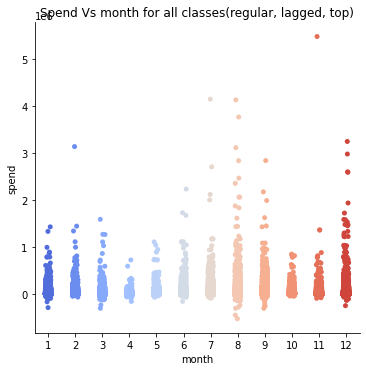

In [68]:
sns.catplot(x="month", y="spend",data=df_with_state, palette="coolwarm")
plt.title("Spend Vs month for all classes(regular, lagged, top)")

Text(0.5, 1.0, 'Spend Vs month for top poc')

<Figure size 1440x1440 with 0 Axes>

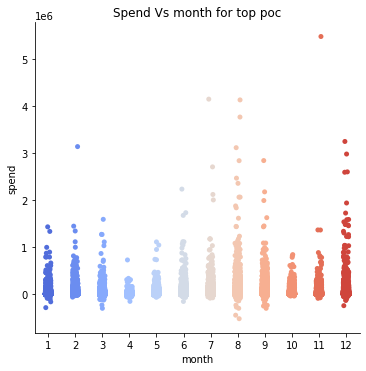

In [69]:
plt.figure(figsize=(20,20))
sns.catplot(x="month", y="spend",data=df_top, palette="coolwarm")
plt.title("Spend Vs month for top poc")

We can see that at April the spend is more lower than other month

Text(0.5, 1.0, 'Spend Vs month for lagged poc')

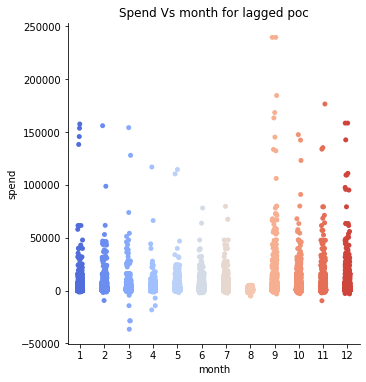

In [70]:
sns.catplot(x="month", y="spend",data=df_lagged, palette="coolwarm")
plt.title("Spend Vs month for lagged poc")

As we can see, at August, the lagged poc's spend is very low relative to other months

##### Spend Vs Category (for all, for top poc and lagged poc)

In [99]:
spend_vs_cat = df_with_state.groupby("category")["spend"].count().sort_values(ascending=False)
spend_vs_cat_high = spend_vs_cat[spend_vs_cat>20e03]
spend_vs_cat_high

category
CERVEZAS               1366740
REFRESCOS               952830
MALTAS                  260147
DESTILADOS               85595
ENERGIZANTES             78967
MALTAS + APERITIVOS      22778
VINO                     20978
Name: spend, dtype: int64

Text(0, 0.5, 'Spend')

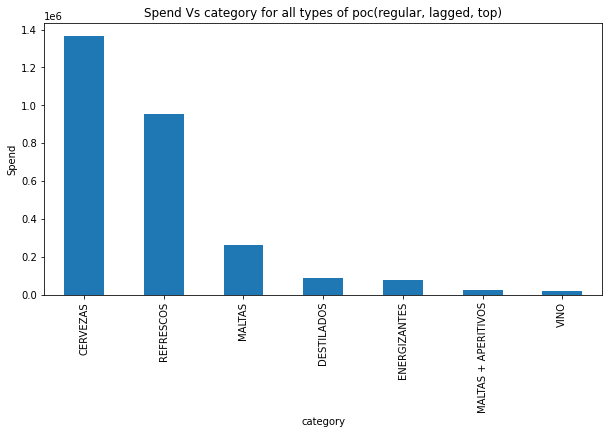

In [98]:
spend_vs_cat = df_with_state.groupby("category")["spend"].count().sort_values(ascending=False)
spend_vs_cat_high = spend_vs_cat[spend_vs_cat>20e03]
spend_vs_cat_high.plot(kind='bar')
plt.title("Spend Vs category for all types of poc(regular, lagged, top)")
plt.ylabel("Spend")

As we can see, the most popular categories are: 

CERVEZAS     
REFRESCOS and
MALTAS                 
DESTILADOS               
ENERGIZANTES             
MALTAS + APERITIVOS and VINO

That mean, the bear beverages is the most populat category people prefering to buy

In [103]:
spend_vs_cat_top = df_top.groupby("category")["spend"].count().sort_values(ascending=False)
spend_vs_cat_top = spend_vs_cat_top[spend_vs_cat_top>12e03]
spend_vs_cat_top

category
CERVEZAS        199443
REFRESCOS       102565
MALTAS           25060
DESTILADOS       12427
ENERGIZANTES     12331
Name: spend, dtype: int64

Text(0, 0.5, 'Spend')

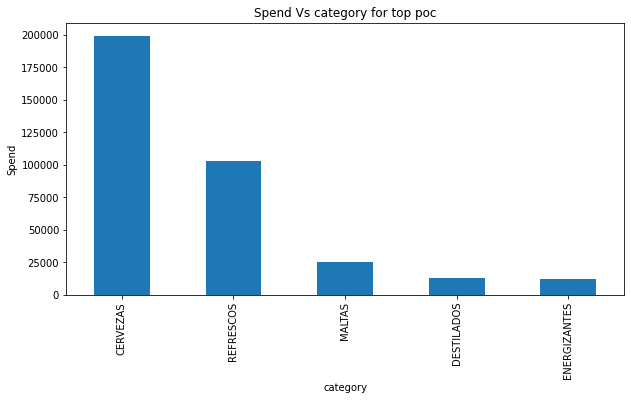

In [104]:
spend_vs_cat_top.plot(kind='bar')
plt.title("Spend Vs category for top poc")
plt.ylabel("Spend")

In [107]:
spend_vs_cat_lagged = df_lagged.groupby("category")["spend"].count().sort_values(ascending=False)
spend_vs_cat_lagged = spend_vs_cat_lagged[spend_vs_cat_lagged>1e03]
spend_vs_cat_lagged

category
REFRESCOS              68921
CERVEZAS               22745
MALTAS                 16743
DESTILADOS              2410
ENERGIZANTES            2135
MALTAS + APERITIVOS     1451
Name: spend, dtype: int64

Text(0, 0.5, 'Spend')

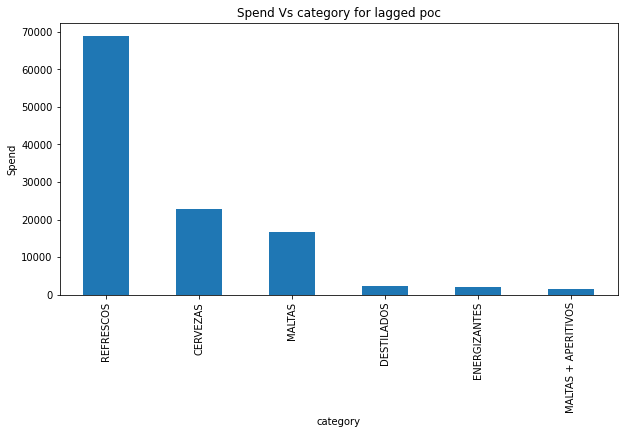

In [109]:
spend_vs_cat_lagged.plot(kind='bar')
plt.title("Spend Vs category for lagged poc")
plt.ylabel("Spend")

As we can see, in top pocs the popular category is the CERVEZAS, while in lagged pocs this category is not the popular one.
In lagged poc the most popular category is the REFRESCOS

In [110]:
df_with_state

,order_time,poc_id,sku,description,qty,spend,category,category_eng,year,month,...,measurement,measurement_type,units_in_pack,returnable_pack_type,returnable_serving_type,serving_type,calculated_volume_liter,pack_type,image_title,state
0,2019-10-09,420266,B000068,PTE LG HU 33.8 OZ PROMOCION,2,2716.57,CERVEZAS,BEER,2019,10,...,33.8,OZ,12.0,1.0,1.0,BOTTLE,11.995214,HUACAL,PRESIDENTE LIGHT_33.8 OZ_BOTTLE,Regular
1,2019-10-09,420266,B000082,THE ONE HU 16/22OZ,2,2939.17,CERVEZAS,BEER,2019,10,...,22.0,OZ,16.0,1.0,1.0,BOTTLE,10.410048,HUACAL,THE ONE_22 OZ_BOTTLE,Regular
2,2019-10-09,420266,B000231,PTE REG HU 33.8 OZ PROMOCION,2,2716.57,CERVEZAS,BEER,2019,10,...,33.8,OZ,12.0,1.0,1.0,BOTTLE,11.995214,HUACAL,PRESIDENTE_33.8 OZ_BOTTLE,Regular
3,2019-10-09,420266,B001424,M. LOW. CJ 24/13OZ ONE WAY,0,0.00,MALTAS,MALT BEER,2019,10,...,13.0,OZ,24.0,0.0,0.0,BOTTLE,9.227088,CARTON,LOWENBRAU_13 OZ_BOTTLE,Regular
4,2019-10-09,420266,B001435,BRAHMA LIGHT HU 12/1L 33.8 ONZ,2,2522.53,CERVEZAS,BEER,2019,10,...,33.8,OZ,12.0,1.0,1.0,BOTTLE,11.995214,HUACAL,BRAHMA LIGHT_33.8 OZ_BOTTLE,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841836,2020-09-09,537056,S000169,PEPSI COLA PET 12/450 ML,2,368.42,REFRESCOS,SOFT DRINKS,2020,9,...,450.0,ML,12.0,0.0,0.0,BOTTLE,5.400000,FRADO,Pepsi Regular_450 ML_BOTTLE,Lagged
2841837,2020-09-09,537056,S000282,RED ROCK NARANJA PET 12/450 ML,2,368.42,REFRESCOS,SOFT DRINKS,2020,9,...,450.0,ML,12.0,0.0,0.0,BOTTLE,5.400000,FRADO,Red Rock Naranja_450 ML_BOTTLE,Lagged
2841838,2020-09-09,537056,S000285,RED ROCK MANZANA VERDE PET 12/450 ML,3,552.64,REFRESCOS,SOFT DRINKS,2020,9,...,450.0,ML,12.0,0.0,0.0,BOTTLE,5.400000,FRADO,Red Rock Manzana_450 ML_BOTTLE,Lagged
2841839,2020-09-09,537056,S000286,RED ROCK MERENROCK PET 12/450 ML,2,368.42,REFRESCOS,SOFT DRINKS,2020,9,...,450.0,ML,12.0,0.0,0.0,BOTTLE,5.400000,FRADO,Red Rock Merengue_450 ML_BOTTLE,Lagged


In [122]:
spend_vs_sku = df_with_state.groupby("sku")["spend"].count().sort_values(ascending=False)
spend_vs_sku_high = spend_vs_sku[spend_vs_sku>50e03]
spend_vs_sku_high

sku
B000060    256384
B000082    156436
S000283    137998
B000068    115040
S000287    110978
B000023    108135
S000170     97378
B001435     94309
S000285     93273
B000603     88872
B000061     88143
S000286     80518
B000081     69407
B000596     62078
S000299     60924
B001433     58823
S000282     55232
Name: spend, dtype: int64

Text(0, 0.5, 'Spend')

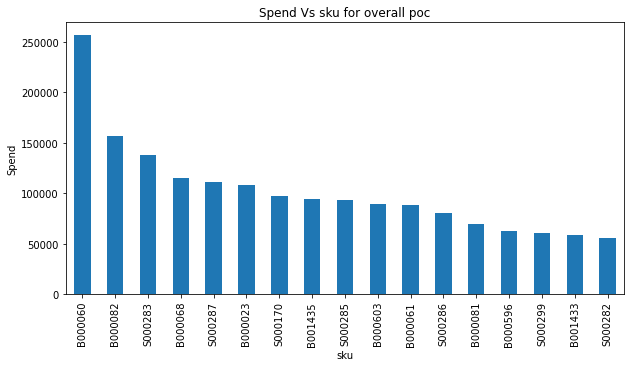

In [123]:
spend_vs_sku_high.plot(kind='bar')
plt.title("Spend Vs sku for overall poc")
plt.ylabel("Spend")

In [154]:
spend_vs_sku_top = df_top.groupby("sku")["spend"].count().sort_values(ascending=False) 

sku       spend  
B001432   0.00       1.000000
ZM000012  816.01     1.000000
B001478   1898.75    1.000000
S000124   0.00       1.000000
R002257   0.00       1.000000
S000100   0.00       1.000000
ZSD00002  925.00     0.909091
ZL000015  1600.01    0.900000
ZPF00010  2150.00    0.888889
B001048   682.90     0.857143
Name: spend, dtype: float64

In [165]:
a = spend_vs_sku_top.reset_index()
b= a["spend"].div(a["spend"].sum()).multiply(100) #div - element wise divide
b.values.sum()

100.0

In [163]:
a = spend_vs_sku_top.reset_index()
a

,sku,spend
0,B000060,31115
1,B000082,17455
2,B000023,15060
3,S000283,13717
4,B000068,13194
...,...,...
230,S000124,2
231,B000253,2
232,B001478,1
233,R002257,1


In [160]:
spend_vs_sku_top = df_top.groupby("sku")["spend"].count().sort_values(ascending=False) 
spend_vs_sku_top_high = spend_vs_sku_top[spend_vs_sku_top>5e03]
spend_vs_sku_top_high

sku
B000060    31115
B000082    17455
B000023    15060
S000283    13717
B000068    13194
B000596    12676
B000061    12186
B001435    11625
S000287    10482
S000170     9277
B001433     9244
B000081     8627
B000603     8597
S000285     8074
S000286     7647
B001363     7358
B001431     6996
S000299     6226
B000231     6197
S000290     5951
S000161     5877
B000024     5745
B000058     5512
S000282     5425
S000288     5243
Name: spend, dtype: int64

In [168]:
spend_vs_sku_top_per = spend_vs_sku_top.reset_index()
spend_vs_sku_top_per["percenrage_spend"]= spend_vs_sku_top_per["spend"].div(spend_vs_sku_top_per["spend"].sum()).multiply(100) #div - element wise divide
spend_vs_sku_top_per

,sku,spend,percenrage_spend
0,B000060,31115,8.529482
1,B000082,17455,4.784948
2,B000023,15060,4.128413
3,S000283,13717,3.760258
4,B000068,13194,3.616889
...,...,...,...
231,B000253,2,0.000548
232,B001478,1,0.000274
233,R002257,1,0.000274
234,B001432,1,0.000274


Text(0, 0.5, 'Spend')

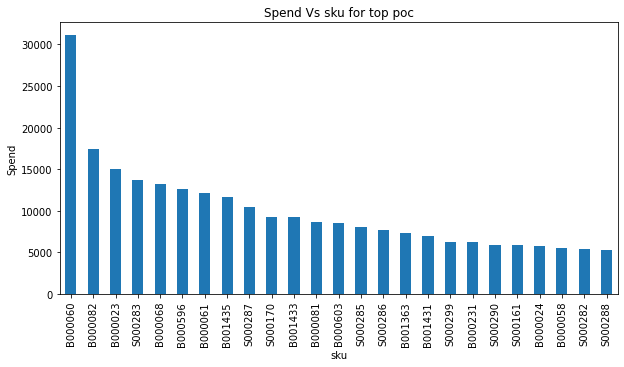

In [140]:
spend_vs_sku_top_high.plot(kind='bar')
plt.title("Spend Vs sku for top poc")
plt.ylabel("Spend")

In [133]:
spend_vs_sku_lagged = df_lagged.groupby("sku")["spend"].count().sort_values(ascending=False)
spend_vs_sku_lagged_high = spend_vs_sku_lagged[spend_vs_sku_lagged>5e03]
spend_vs_sku_lagged_high

sku
S000283    10691
S000287     9684
S000170     8684
S000285     8610
S000286     7506
B000060     5842
B000603     5821
S000282     5497
S000169     5087
Name: spend, dtype: int64

Text(0, 0.5, 'Spend')

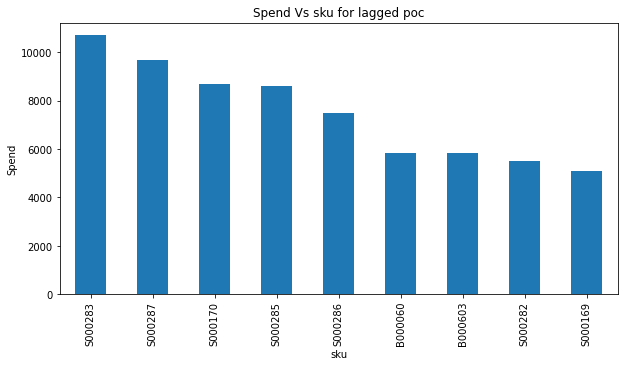

In [134]:
spend_vs_sku_lagged_high.plot(kind='bar')
plt.title("Spend Vs sku for lagged poc")
plt.ylabel("Spend")

Let's find intersection between the top's sku and lagged's poc

In [151]:
pd.Series(np.intersect1d(spend_vs_sku_lagged_high.index,spend_vs_sku_top_high.index))

0    B000060
1    B000603
2    S000170
3    S000282
4    S000283
5    S000285
6    S000286
7    S000287
dtype: object

#### Unique values in each column

In [24]:
for name in df.columns: 
    un_name = df[name].unique()
    print(f"Unique value in {name} column: \n{un_name} \n")

Unique value in order_time column: 
['2019-10-09' '2019-10-10' '2019-10-11' '2019-10-12' '2019-10-01'
 '2019-10-02' '2019-10-03' '2019-10-13' '2019-10-14' '2019-10-04'
 '2019-10-05' '2019-10-15' '2019-10-06' '2019-10-07' '2019-10-16'
 '2019-10-08' '2019-10-17' '2019-10-18' '2019-10-19' '2019-10-20'
 '2019-10-21' '2019-10-22' '2019-10-23' '2019-10-24' '2019-10-25'
 '2019-10-26' '2019-10-27' '2019-10-28' '2019-10-29' '2019-10-30'
 '2019-10-31' '2019-11-19' '2019-11-11' '2019-11-12' '2019-11-20'
 '2019-11-13' '2019-11-21' '2019-11-14' '2019-11-22' '2019-11-23'
 '2019-11-15' '2019-11-24' '2019-11-25' '2019-11-26' '2019-11-16'
 '2019-11-27' '2019-11-17' '2019-11-18' '2019-11-28' '2019-11-29'
 '2019-11-30' '2019-11-01' '2019-11-02' '2019-11-03' '2019-11-05'
 '2019-11-06' '2019-11-07' '2019-11-08' '2019-11-09' '2019-11-10'
 '2019-12-13' '2019-12-14' '2019-12-15' '2019-12-16' '2019-12-17'
 '2019-12-18' '2019-12-19' '2019-12-20' '2019-12-21' '2019-12-22'
 '2019-12-23' '2019-12-02' '2019-12-03' 

Unique value in category column: 
['CERVEZAS' 'MALTAS' 'DESTILADOS' 'REFRESCOS' 'MALTAS + APERITIVOS'
 'ENERGIZANTES' 'AGUA' 'DESTILADOS + REFRESCOS' 'EVAPORATED MILK'
 'APERITIVOS' 'LECHE' 'CIGARRILLOS' 'COMIDA ENLATADA' 'SARDINAS' 'VINO'
 'CONDIMENTO' 'CUIDADO PERSONAL' 'MAIZENA DURYEA'] 

Unique value in category_eng column: 
['BEER' 'MALT BEER' 'LIQUOR' 'SOFT DRINKS' 'MALT BEER + SNACKS'
 'ENERGY DRINKS' 'WATER' 'LIQUOR + SOFT DRINKS' 'EVAPORATED MILK' 'SNACKS'
 'MILK' 'CIGARETTES' 'CANNED FOOD' 'SARDINES' 'WINE' 'SEASONING'
 'PERSONAL CARE' 'CORN STARCH'] 

Unique value in year column: 
[2019 2020] 

Unique value in month column: 
[10 11 12  9  1  2  3  4  5  6  7  8] 

Unique value in is_cnd column: 
[1 0] 

Unique value in family_brand_name column: 
['PRESIDENTE' 'THE ONE' 'LOWENBRAU' 'BRAHMA' 'BARCELO' 'SEVEN UP'
 'RED ROCK' 'MALTA MORENA' 'PEPSI COLA' 'GUARANA' 'RED BULL' 'CORONA'
 'MODELO' 'ENRIQUILLO' 'BOHEMIA' 'VITAMALT' 'MONTPELLIER' 'COCO RICO'
 'STELLA ARTOIS' 'BUDWEISER

#### sdv

In [22]:
sns.boxplot(x="color", y="gross", data=df[ df.title_year>=1990 ])

(244, 25)

In [23]:
df["poc_id"].unique().shape

(10630,)

In [24]:
df[df["spend"]==0].shape

(101487, 25)

In [25]:
df[df["qty"]==0].shape

(177414, 25)

In [26]:
df["poc_id"].unique().shape

(10630,)

In [83]:
df[df["poc_id"]==230230].shape

(788, 25)

In [82]:
poc_id_count = df.groupby("poc_id")["poc_id"].count()
poc_id_count_500 = poc_id_count[poc_id_count >500]
poc_id_count_500

poc_id
230230    788
230236    537
230248    509
230257    671
230259    533
         ... 
529333    540
529392    616
529559    518
529624    531
529874    503
Name: poc_id, Length: 1117, dtype: int64

In [78]:
poc_id_count = df.groupby("poc_id")["poc_id"].count()
poc_id_count_500 = poc_id_count[poc_id_count >500]
df_500 = 
df_500


<ipython-input-78-825075b19d93>:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  df_500 = df.where(df["poc_id"].values in c)


ValueError: Array conditional must be same shape as self

In [40]:
poc_id_count[poc_id_count >500].shape

(1117,)

In [84]:
poc_count = df.groupby("poc_id")["poc_id"].count()
poc_count

poc_id
229731    203
230230    788
230231    261
230234    400
230236    537
         ... 
536881      8
536947     64
536949     92
536963     65
537056     13
Name: poc_id, Length: 10630, dtype: int64

In [136]:
poc_spend = df.groupby("poc_id")["spend"].mean().values
poc_count = df.groupby("poc_id")["poc_id"].count().values
c = np.array([poc_spend,poc_count]).T
df_culster = pd.DataFrame(c,columns='spend purches_number'.split())
df_culster

,spend,purches_number
0,4.911330,203.0
1,4.748731,788.0
2,3.463602,261.0
3,2.920000,400.0
4,2.800745,537.0
...,...,...
10625,0.375000,8.0
10626,1.390625,64.0
10627,2.489130,92.0
10628,1.723077,65.0


In [120]:
df.groupby("poc_id")["spend"].sum().values

array([1064932.67, 4488996.21,  634415.62, ...,  217738.35,   92544.83,
          4659.39])

In [119]:
df.groupby("poc_id")["poc_id"].count().values

array([203, 788, 261, ...,  92,  65,  13], dtype=int64)

Automatically created module for IPython interactive environment


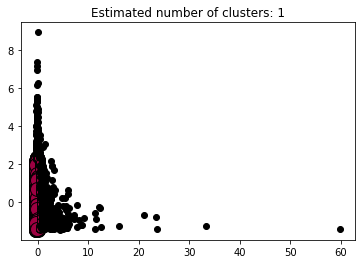

In [137]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Standrize data


X = StandardScaler().fit_transform(df_culster)
#X = df_culster
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=200).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

      
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [115]:
X

array([[-0.35706194, -0.35706194],
       [ 2.88938046,  2.88938046],
       [-0.03519244, -0.03519244],
       ...,
       [-0.97305357, -0.97305357],
       [-1.12288938, -1.12288938],
       [-1.41146203, -1.41146203]])

Automatically created module for IPython interactive environment


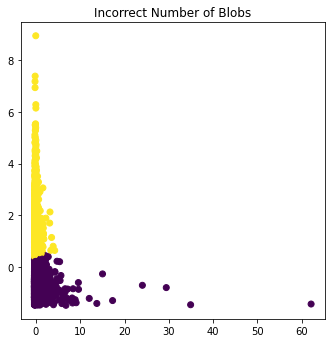

In [135]:
print(__doc__)

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


plt.figure(figsize=(12, 12))
random_state = 170


# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")







plt.show()

In [2]:
from sklearn.model_selection import train_test_split

In [13]:
df_agg = pd.read_csv("agg_features_and_label.csv")
df_agg.head()

,poc_id,state,CND_value_3_mean,CND_value_3_std,CND_value_6_mean,CND_value_6_std,CND_value_9_mean,CND_value_9_std,CND_repeated_SKU_monthly_3_share,CND_repeated_SKU_monthly_6_share,CND_repeated_SKU_monthly_9_share,CND_BEER_premium_share_3_share,CND_BEER_premium_share_6_share,CND_BEER_premium_share_9_share
0,229731.0,Regular,22226.942222,14124.444781,26607.735556,22359.674905,25016.042069,19770.147627,0.116279,0.161616,0.277027,0.061921,0.061921,0.061921
1,230230.0,Top,69463.377222,56541.197203,65886.146176,49572.509219,68357.095556,47539.085310,0.658163,0.725333,0.733583,0.016439,0.016439,0.016439
2,230231.0,Regular,13414.643750,10369.936256,12292.888889,8194.832476,13139.000645,9263.518837,0.428571,0.575000,0.560976,0.000000,0.000000,0.000000
3,230234.0,Regular,26551.682308,15795.106353,27529.522632,13934.925370,32583.551034,14676.230362,0.250000,0.382716,0.483516,0.013039,0.013039,0.013039
4,230236.0,Regular,28587.850000,18978.847726,21479.410833,19067.966300,22515.497750,19610.480498,0.433628,0.493450,0.548747,0.059492,0.059492,0.059492


In [28]:
spend_col = df.groupby("poc_id")["spend"].sum()
qty_col = df.groupby("poc_id")["qty"].sum()
returnable_serving_col = df.groupby("poc_id")["returnable_serving_type"].sum()
df_agg["sum_spend"] = spend_col.values
df_agg["sum_qty"] = qty_col.values
df_agg["returnable_serving_type"]
features = df_agg[["CND_value_3_mean", "CND_value_6_mean", "CND_value_9_mean", "sum_spend", "sum_qty", "returnable_serving_type"]]
label = df_agg["state"]
X_train, X_test, y_train, y_test = train_test_split(features,label,
                                                    test_size=0.30)

KeyError: ''

In [25]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


X = X_train  # we only take the first two features for visualization
y = y_train

X = StandardScaler().fit_transform(X)

n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    'L1 logistic': LogisticRegression(C=C, penalty='l1',
                                      solver='saga',
                                      multi_class='multinomial',
                                      max_iter=10000),
    'L2 logistic (Multinomial)': LogisticRegression(C=C, penalty='l2',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000),
    'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2',
                                            solver='saga',
                                            multi_class='ovr',
                                            max_iter=10000),
    'Gaussian SVC': SVC( C=C, probability=True,
                      random_state=0)
    
}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))



Automatically created module for IPython interactive environment
Accuracy (train) for L1 logistic: 88.4% 
Accuracy (train) for L2 logistic (Multinomial): 88.4% 
Accuracy (train) for L2 logistic (OvR): 85.4% 
Accuracy (train) for Linear SVC: 88.9% 


<Figure size 432x576 with 0 Axes>

In [27]:
X = X_test  # we only take the first two features for visualization
y = y_test

X = StandardScaler().fit_transform(X)
for index, (name, classifier) in enumerate(classifiers.items()):

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

Accuracy (train) for L1 logistic: 84.4% 
Accuracy (train) for L2 logistic (Multinomial): 84.4% 
Accuracy (train) for L2 logistic (OvR): 84.3% 
Accuracy (train) for Linear SVC: 84.4% 


In [18]:
df_agg

,poc_id,state,CND_value_3_mean,CND_value_3_std,CND_value_6_mean,CND_value_6_std,CND_value_9_mean,CND_value_9_std,CND_repeated_SKU_monthly_3_share,CND_repeated_SKU_monthly_6_share,CND_repeated_SKU_monthly_9_share,CND_BEER_premium_share_3_share,CND_BEER_premium_share_6_share,CND_BEER_premium_share_9_share,sum_spend
0,229731.0,Regular,22226.942222,14124.444781,26607.735556,22359.674905,25016.042069,19770.147627,0.116279,0.161616,0.277027,0.061921,0.061921,0.061921,1064932.67
1,230230.0,Top,69463.377222,56541.197203,65886.146176,49572.509219,68357.095556,47539.085310,0.658163,0.725333,0.733583,0.016439,0.016439,0.016439,4488996.21
2,230231.0,Regular,13414.643750,10369.936256,12292.888889,8194.832476,13139.000645,9263.518837,0.428571,0.575000,0.560976,0.000000,0.000000,0.000000,634415.62
3,230234.0,Regular,26551.682308,15795.106353,27529.522632,13934.925370,32583.551034,14676.230362,0.250000,0.382716,0.483516,0.013039,0.013039,0.013039,1395608.69
4,230236.0,Regular,28587.850000,18978.847726,21479.410833,19067.966300,22515.497750,19610.480498,0.433628,0.493450,0.548747,0.059492,0.059492,0.059492,1411719.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,536881.0,Lagged,392.980000,NaN,392.980000,NaN,392.980000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,970.98
10626,536947.0,Regular,9226.910000,NaN,9226.910000,NaN,9226.910000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87534.42
10627,536949.0,Regular,4562.200000,NaN,4562.200000,NaN,4562.200000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,217738.35
10628,536963.0,Regular,3187.090000,NaN,3187.090000,NaN,3187.090000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92544.83


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)